Importing libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FOOD-DATA-GROUP.csv to FOOD-DATA-GROUP.csv


In [4]:
df = pd.read_csv('FOOD-DATA-GROUP.csv')
df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"
# Drop target as it is not needed in clustering
df = df.drop(target, axis=1)

Column added for feature extraction

In [5]:
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']

Selected features

In [6]:
selected_features = ['Nutrition Density', 'Monounsaturated Fats', 'Phosphorus', 'Calcium', 'Sodium', 'Vitamin B11', 'Dietary Fiber', 'Copper', 'Selenium', 'Protein+Carbohydrates+Fat']
X = df[selected_features]

Removing Outliers

<Axes: >

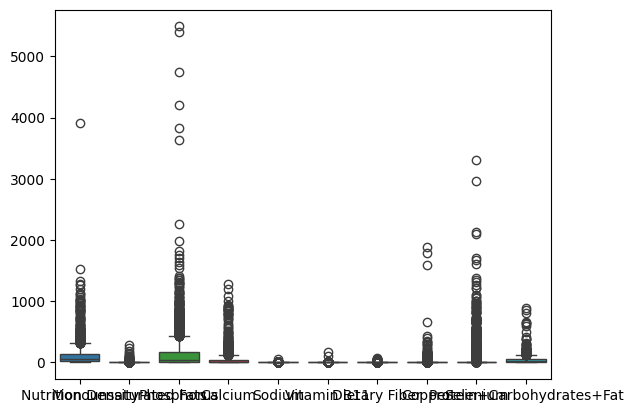

In [7]:
import seaborn as sns
sns.boxplot(X)

In [8]:
from scipy.stats import zscore
z_scores = np.abs(zscore(X))
threshold = 3
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
df_no_outliers = df.loc[X_no_outliers.index]
print(f"Original shape: {df.shape}, Shape after removing outliers: {df_no_outliers.shape}")
X = df_no_outliers[selected_features]

Original shape: (2395, 34), Shape after removing outliers: (2199, 34)


Applying KMeans clustering with optimal k

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
best_k = 2
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)

Fit KMeans to the refined data

In [10]:
kmeans.fit(X_no_outliers)
df['Cluster'] = np.nan
df.loc[X_no_outliers.index, 'Cluster'] = kmeans.labels_

We are visualizing the clustering, and reducing the data to 2D using PCA (Principal Component Analysis)

In [11]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_no_outliers)

Ploting the 2D projection of the clustered data points

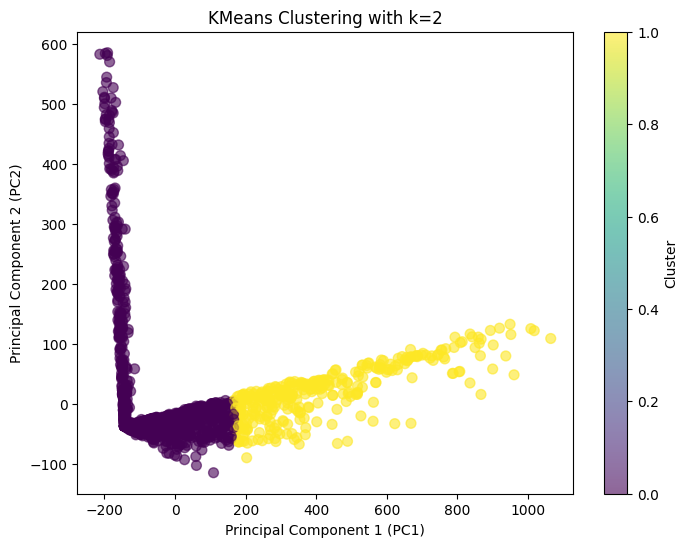

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()


Printing the cluster centers (centroids of each cluster)

In [13]:
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)

Cluster Centers (in original feature space):
[[5.84321962e+01 1.79544677e+00 5.19174473e+01 2.57027704e+01
  2.10416667e-01 5.38811828e-02 1.43344570e+00 5.15835806e+00
  3.34251269e+01 2.40561898e+01]
 [2.05937224e+02 8.76767847e+00 4.97732743e+02 1.01540413e+02
  4.42516224e-01 8.20589971e-02 2.40002655e+00 4.09342183e-01
  5.81297935e-02 8.86687994e+01]]


Checking how many samples belong to each cluster

In [14]:
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0    1860
1     339
Name: count, dtype: int64


Processing cluster method with no of clusters other than 2.

Kmeans with 3

In [15]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)

Fit KMeans to the data

In [16]:
kmeans.fit(X_no_outliers)
df['Cluster'] = np.nan
df.loc[X_no_outliers.index, 'Cluster'] = kmeans.labels_

We are visualizing the clustering, and reducing the data to 2D using PCA (Principal Component Analysis)

In [17]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_no_outliers)

Ploting the 2D projection of the clustered data points

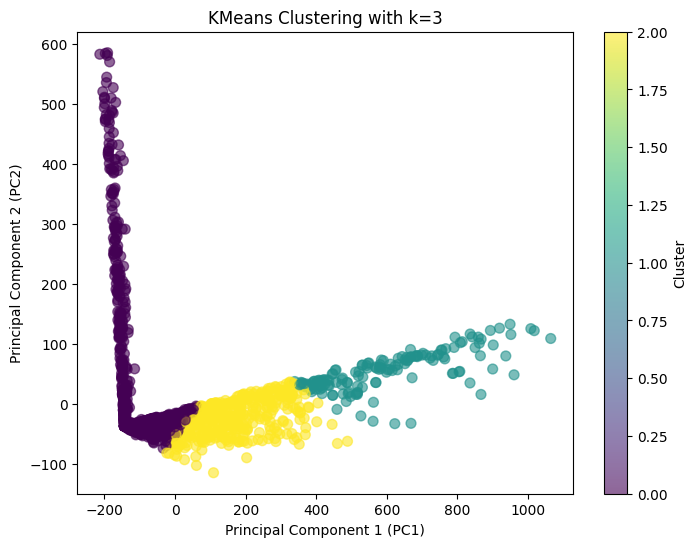

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()


Printing the cluster centers (centroids of each cluster)

In [19]:
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)

Cluster Centers (in original feature space):
[[4.17862682e+01 1.54912570e+00 3.29949919e+01 1.50146565e+01
  1.81373367e-01 5.22993155e-02 1.24479091e+00 5.92274860e+00
  3.86805084e+01 1.96333317e+01]
 [2.12360630e+02 1.24075342e+01 7.06077397e+02 8.35801370e+01
  3.04780822e-01 1.03232877e-01 2.07671233e+00 5.52136986e-01
  7.56712329e-02 1.08504795e+02]
 [1.80137711e+02 4.50858520e+00 2.44815247e+02 1.02910538e+02
  4.60589686e-01 6.48430493e-02 2.63730717e+00 3.02340807e-01
  4.44327354e-02 6.14591300e+01]]


Checking how many samples belong to each cluster




In [20]:
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0    1607
1     146
2     446
Name: count, dtype: int64


Kmeans with 5

In [21]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)

Fit KMeans to the data

In [22]:
kmeans.fit(X_no_outliers)
df['Cluster'] = np.nan
df.loc[X_no_outliers.index, 'Cluster'] = kmeans.labels_

We are visualizing the clustering, and reducing the data to 2D using PCA (Principal Component Analysis)

In [23]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_no_outliers)

Ploting the 2D projection of the clustered data points

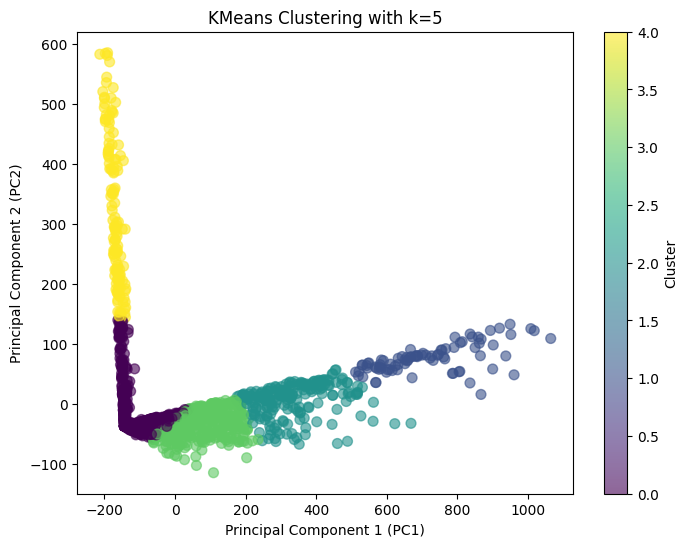

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel(f"Principal Component 1 (PC1)")
plt.ylabel(f"Principal Component 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()

Printing the cluster centers (centroids of each cluster)

In [25]:
print("Cluster Centers (in original feature space):")
print(kmeans.cluster_centers_)

Cluster Centers (in original feature space):
[[3.36831992e+01 1.44709808e+00 2.83262475e+01 1.22229073e+01
  1.52887356e-01 4.24858238e-02 8.88259770e-01 2.12492337e+00
  8.41255096e+00 1.52214222e+01]
 [2.16385298e+02 1.29964286e+01 8.30209524e+02 7.60392857e+01
  2.23904762e-01 1.08011905e-01 8.70238095e-01 5.71190476e-01
  8.94404762e-02 1.16283333e+02]
 [1.95832502e+02 8.02686730e+00 4.17999526e+02 1.00976303e+02
  4.89094787e-01 7.21232227e-02 2.86118009e+00 3.69056872e-01
  4.95118483e-02 8.29835592e+01]
 [1.53347306e+02 3.14093450e+00 1.53606769e+02 8.42327511e+01
  4.19093886e-01 6.16288210e-02 2.62713974e+00 2.60997817e-01
  4.30196507e-02 5.10666070e+01]
 [3.41130496e+01 1.41414184e+00 3.17014184e-01 4.65177305e-02
  1.98000000e-01 1.42382979e-01 3.12482270e+00 4.76234043e+01
  3.62939007e+02 3.03081064e+01]]


Checking how many samples belong to each cluster

In [26]:
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
0    1307
1      84
2     211
3     456
4     141
Name: count, dtype: int64
